In [2]:
from IPython.display import Image

## Omega and Xi

To implement Graph SLAM, a matrix and a vector (omega and xi, respectively) are introduced. The matrix is a square and labelled with all the robot poses (xi) and all the landmarks (Li). Every time you make an observation, for example, as you move between two poses crossing some distance `dx` and can relate those two positions, you can represent this as a numerical relationship in these matrices. In short, 
* the matrix omega represents the possible robot poses and lanmarks
* the vector xi represents the corresponding distance between two robot poses, Or, distance between a robot pose and a landmark 

It's easiest to see how these work in an example. Below you can see a matrix representation of omega and a vector representation of xi.

---

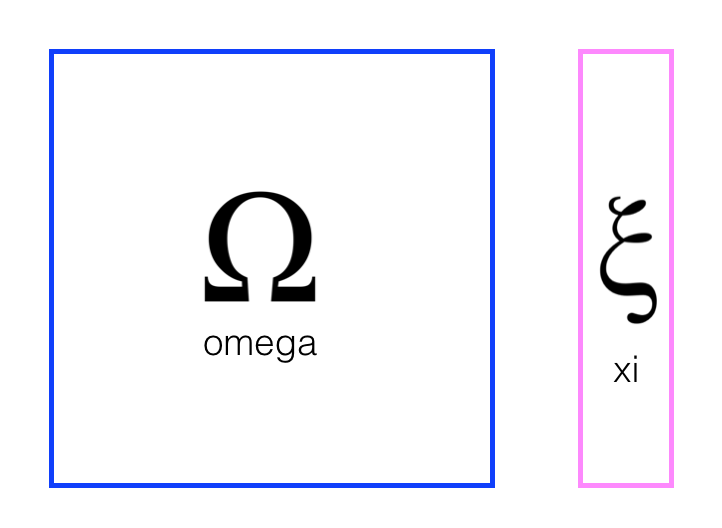

In [3]:
Image(filename="images/omega_xi.png")

Next, let's look at a simple example that relates 3 poses to one another. 
* When you start out in the world most of these values are zeros or contain only values from the initial robot position
* In this example, you have been given constraints, which relate these poses to one another
* Constraints translate into matrix values

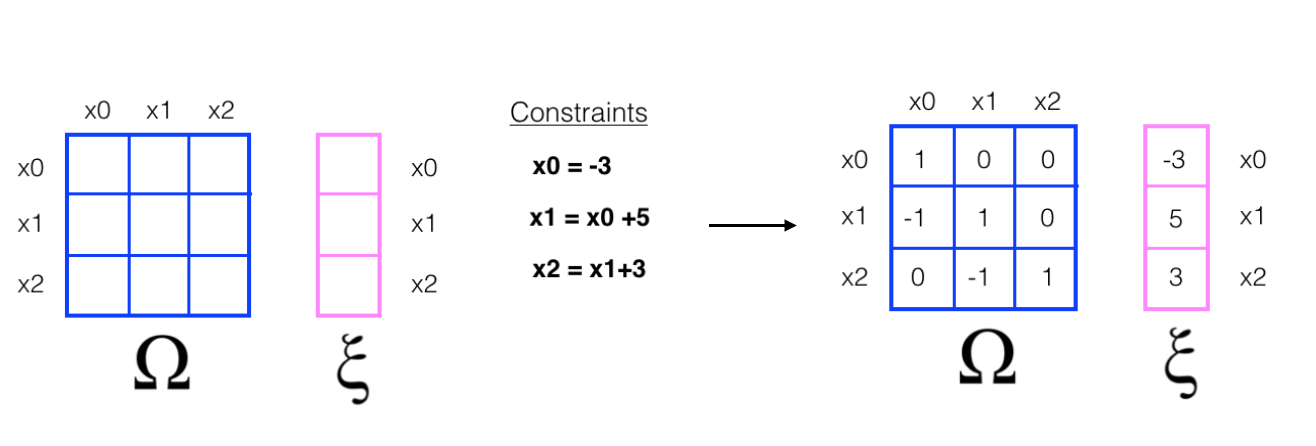

In [4]:
Image(filename="images/omega_xi_constraints.png")

### Solving for x

To "solve" for all these x values, we can use linear algebra; all the values of x are in the vector `mu` which can be calculated as a product of the inverse of omega times xi.

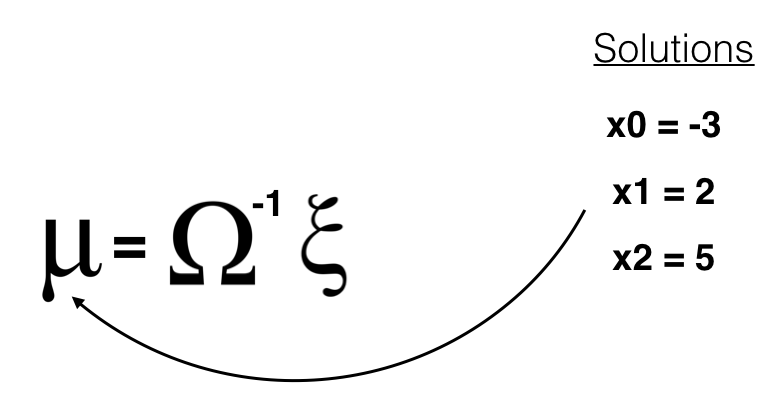

In [5]:
Image(filename="images/solution.png")

**We can confirm this result by executing the math in the cell below.**

In [6]:
import numpy as np

# define omega and xi as in the example
omega = np.array([[1,0,0],
                  [-1,1,0],
                  [0,-1,1]])

xi = np.array([[-3],
               [5],
               [3]])

# calculate the inverse of omega
omega_inv = np.linalg.inv(np.matrix(omega))

# calculate the solution, mu
mu = omega_inv*xi

# print out the values of mu (x0, x1, x2)
print(mu)

[[-3.]
 [ 2.]
 [ 5.]]


## Motion Constraints and Landmarks

In the last example, the constraint equations, relating one pose to another were given to you. In this next example, let's look at how motion (and similarly, sensor measurements) can be used to create constraints and fill up the constraint matrices, omega and xi. Let's start with empty/zero matrices.

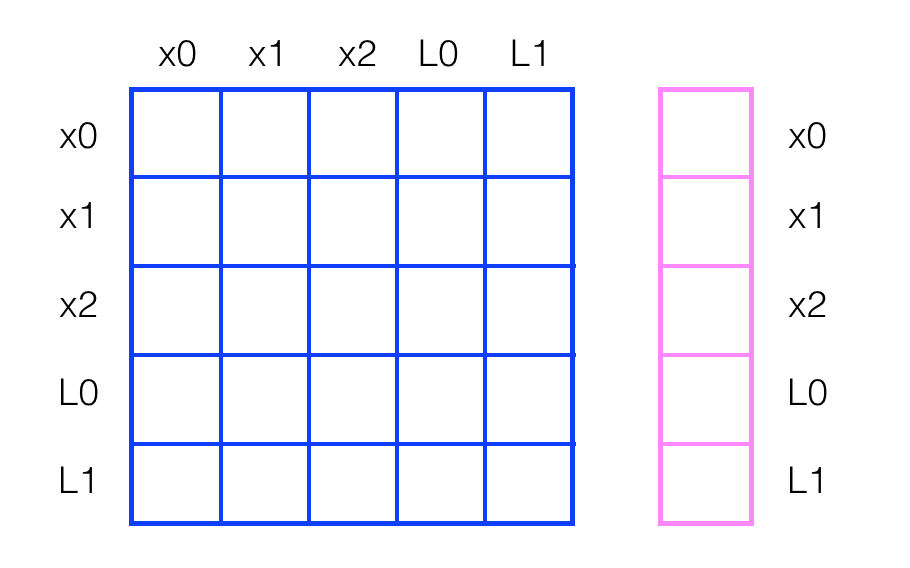

In [7]:
Image(filename="images/initial_constraints.png")

This example also includes relationships between poses and landmarks. Say we move from x0 to x1 with a displacement `dx` of 5. Then we have created a motion constraint that relates x0 to x1, and we can start to fill up these matrices.

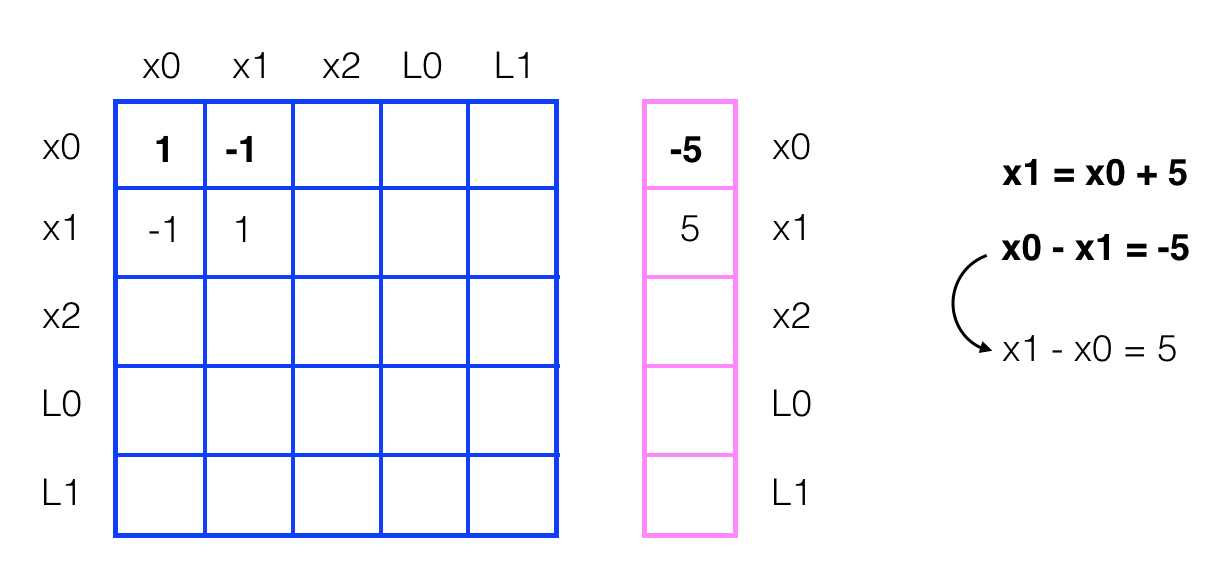

In [8]:
Image(filename="images/motion_constraint.png")

In fact, the one constraint equation can be written in two ways. So, the motion constraint that relates x0 and x1 by the motion of 5 has affected the matrix, adding values for *all* elements that correspond to x0 and x1.

### 2D case

In these examples, we have been showing the changes in only one dimension, the x-dimension. In the project, the task will be to represent x and y positional values in omega and xi. One solution could be to create an omega and xi that are 2x larger, so that they can hold both x and y values for poses.